This is an attempt of clothes classification using the MNIST 
Keras will be utilised to train the model

In [159]:
# DEFINING ALL OF THE IMPORTS

# __future__ allows for compatability of certain commands
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plot

# Loading in the dataset:

'Fashion MNIST' dataset is utilised https://www.kaggle.com/zalando-research/fashionmnist
Contains 70k fashion based images of 10 different categories - 28x28 pixels
stored within the keras dataset library, with specified train, test data:
6:1 split between train:test data 

all, train_images, train_labels, test_images, test_labels are all arrays. 

The train set is defined by: (train_images, train_labels)
and the test set defined by: (test_images, test_labels)

In [160]:
MNIST_fashion_data = keras.datasets.fashion_mnist
(train_images, train_types), (test_images, test_types) = MNIST_fashion_data.load_data()

# Info on the data:

Image dataset contains the 28x28 monoscale images. 
Each image belongs to a type, each type is associated with a number, 0 to 9:
0: tshirt, 1: trouser, 2: jumper, 3: dress, 4: coat, 5: sandal, 6: shirt, 7: sneaker, 8: bag, 9: ankle boot

There are a total of 70,000 images, 60,000 training images, 10,000 test. So respectivelly there are 60,000 training_types and 10,000 test_types.

## Testing images shape: 

In [161]:
print('Testing images shape: ')
test_images.shape

Testing images shape: 


(10000, 28, 28)

In [162]:
print('Training images shape: ')
train_images.shape

Training images shape: 


(60000, 28, 28)

The types will match the amount of elements as the first element of the shape for both testing and training. 

# Data Preprocessing

## Example data plot:

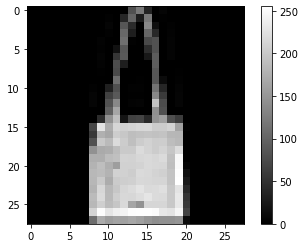

In [163]:
plot.imshow(train_images[200], cmap="gray",vmin=0, vmax=255)
plot.grid(False)
plot.colorbar()
plot.show()

### Normalisation of data:

In order to simplify the model and speed up processing time, it is important the data is remapped into floats between 0 and 1.  
The maximum possible value within the dataset is 255.  
Thus all data is divided by 255

In [164]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In order to classify the data the numerical type 0-9 is to be mapped to strings representing each clothing type:

In [165]:
clothing_types = ['T-shirt', 'Trouser', 'Jumper', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle-boot']

# Defining the model:

The layers within the nerual network need to be defined.  
For classification of the clothes, I will only define one hidden layer which then outputs to the output layer representing each of the classes.  
A densely connected NN is whereby the neurons in the input are connected to every single 


In [166]:
# First the format image, a 2D array 28x28 is flattened, to be represented as a 1D 784 long array.
modelInput = [keras.layers.Flatten(input_shape=(28, 28)), 
             keras.layers.Dense(128, activation=tf.nn.relu),
             keras.layers.Dense(10, activation=tf.nn.softmax)
             ]
model = keras.Sequential(modelInput)

## Defining model settings:

These settings define the way the neural network behaves.  
The Optimizer dictates how the model is updated based upon the data and loss function.  
The loss function is how loss is calculated for each predicted output data point with respect to the expected outcome. It is aimed to be minimised during the training process.  
Metrics determine how the training is to be monitored, what defines its success. 

In [167]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Training the model

During training the training dataset for the images and labels are utilised.  
The amount of epochs determines the amount of iterations used to train the model.

In [168]:
model.fit(train_images, train_types, epochs=2)


Epoch 1/2
60000/60000 [==============================] - 1s 25us/sample - loss: 0.4967 - acc: 0.8252
Epoch 2/2
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3767 - acc: 0.8646


In [169]:
model.fit(train_images, train_types, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3382 - acc: 0.8760
Epoch 2/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3127 - acc: 0.8862
Epoch 3/5
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2946 - acc: 0.8916
Epoch 4/5
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2801 - acc: 0.8961
Epoch 5/5
60000/60000 [==============================] - 1s 25us/sample - loss: 0.2679 - acc: 0.9000


In [181]:
model.fit(train_images,train_types, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 25us/sample - loss: 0.1316 - acc: 0.9499
Epoch 2/5
60000/60000 [==============================] - 1s 24us/sample - loss: 0.1298 - acc: 0.9506
Epoch 3/5
60000/60000 [==============================] - 1s 25us/sample - loss: 0.1272 - acc: 0.9522
Epoch 4/5
60000/60000 [==============================] - 2s 25us/sample - loss: 0.1262 - acc: 0.9524
Epoch 5/5
60000/60000 [==============================] - 1s 25us/sample - loss: 0.1209 - acc: 0.9548


# Testing model accuracy:

Now to get an indication of the models accuracy - outside the training data, the model can be evaluated against the test data.  
The difference between the accuracy of the trained model and the test data evaluation is due to overfitting to the training data. This difference is to be minimised.


In [183]:
print(test_images.shape)
loss, acc = model.evaluate(test_images, test_types)
print('accuracy: ', acc)

(10000, 28, 28)
10000/10000 [==============================] - 0s 15us/sample - loss: 0.4399 - acc: 0.8890
accuracy:  0.889


# Predicting new inputs

The trained model achieved an output of 90% accuracy for clothing classification and 87% accuracy when utilising the test data.  
Predictions can now be made with the trained model:  

In [172]:
predictions = model.predict(test_images)

The above variable is an array, of an array of size 10:

In [173]:
predictions.shape

(10000, 10)

Each prediction element contains an array of size 10 with statistical probabilities for what clothes type (class) the image belongs to based upon the models predictions:

Predicted classes:
the values below are floored - so insignificant numbers rounded to 0
T-shirt: 99.0 percent likely
Trouser: 0.0 percent likely
Jumper: 0.0 percent likely
Dress: 0.0 percent likely
Coat: 0.0 percent likely
Sandal: 0.0 percent likely
Shirt: 0.0 percent likely
Sneaker: 0.0 percent likely
Bag: 0.0 percent likely
Ankle-boot: 0.0 percent likely

THE CORRESPONDING IMAGE TO WHAT WAS PREDICTED AGAINST:


Text(0.5, 0, 'T-shirt')

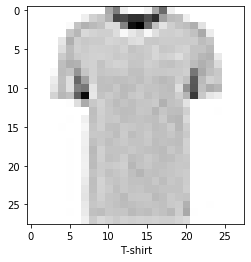

In [174]:
apparel_item = 677
pred1 = predictions[apparel_item]
print('Predicted classes:')
print('the values below are floored - so insignificant numbers rounded to 0')
for i in range(len(pred1)):
    formatted_str = [clothing_types[i], pred1[i]*100]

    print("%s: %s percent likely" % (clothing_types[i], np.floor(pred1[i]*100)))

    
print()
print('THE CORRESPONDING IMAGE TO WHAT WAS PREDICTED AGAINST:')
plot.imshow(test_images[apparel_item], cmap=plot.cm.binary)
plot.xlabel(clothing_types[test_types[apparel_item]])

The predicted clothing item is ankle-boot based upon the first image in the test data set, this value is obtained through use of np.argmax:

In [175]:
np.argmax(predictions[0])

9

### Future Improvements or additions to consider:

- Use of several models to provide prediction in app
    -  Rely on separate datasets - develop models separately, query both models and give the biggest predicted class
    OR
    - Combine datasets - scale up the Fashion MNIST? Add colour via an external library, combine this dataset with the deepfashion
    - Implement removal of background on images taken in app - through inclusion of an external libary
    
    - Rely on on Fashion MNIST model for clothes classification, Deepfashion for feature prediction... 
    
    - Deepfashion dataset better suited for clothing worn on individuals rather than isolated... 
    
    
- Detection of several clothing items in a single image
    - User may take the photo of several of items of clothing
    
    
    
What are the most useful metrics to gain from graphing of the results?


In [176]:
test_images.shape



def predicted_type_comparison():
    arr = {}
    for i in range(len(clothing_types)):
        
        predicted_type = []
        
    
        for j in range(len(test_types)):
            el = np.argmax(predictions[j])
#             print(j)
            if(test_types[j] == i):
#                 print(test_types[j])
                predicted_type.append(el)
        
        arr.update({clothing_types[i]: predicted_type})
    
    return arr

                
extract_type()


# X axis: all test data points
# Y axis: predicted percentage...
#  data points - create 10 lines, for each respective clothes type

def plot_value_array()
        

SyntaxError: invalid syntax (<ipython-input-176-daf59249373d>, line 31)